In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [78]:
# Read the pokedex we scraped in web_scrape.ipynb into a DataFrame
pkmn = pd.read_csv("pokemon.csv")
pkmn.rename(columns={"Unnamed: 0": "wiki_index"}, inplace=True)
pkmn = pkmn[pkmn.primary_type != "Bird"]

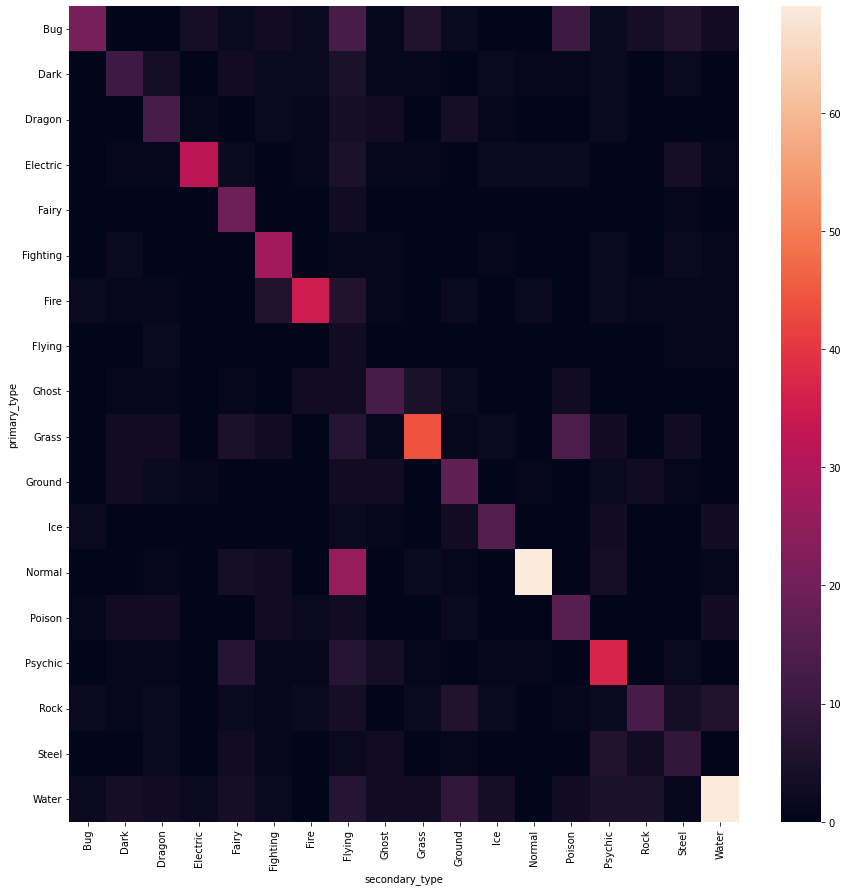

In [79]:
pivot_table = pkmn[["primary_type", "secondary_type"]].value_counts().unstack().fillna(0)
long_form = pkmn[["primary_type", "secondary_type"]].value_counts()

ax = sns.heatmap(pivot_table)
ax.figure.set_size_inches(15, 15)

In [80]:
# Create a TF-IDF vectorizer to transform the text into a matrix of features
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(pkmn["Notes"]).toarray()
y = pkmn["primary_type"]
print(X.shape, y.shape)
list(vectorizer.get_feature_names_out())

(935, 6229) (935,)


['000',
 '01',
 '02',
 '03',
 '04',
 '05',
 '10',
 '100',
 '1000',
 '100x',
 '101',
 '108',
 '11',
 '12',
 '120',
 '13',
 '14',
 '148',
 '15',
 '150',
 '16',
 '17',
 '18',
 '180',
 '19',
 '1950s',
 '1970s',
 '1997',
 '1px',
 '20',
 '200',
 '2000',
 '2003',
 '2005',
 '2007',
 '2008',
 '2009',
 '2013',
 '2014',
 '2015',
 '2016',
 '2018',
 '2019',
 '2020',
 '2021',
 '20th',
 '21',
 '22',
 '23',
 '23rd',
 '24',
 '242',
 '25',
 '26',
 '27',
 '28',
 '29',
 '294',
 '296',
 '2nd',
 '30',
 '300',
 '31',
 '310',
 '32',
 '33',
 '34',
 '35',
 '36',
 '360',
 '36th',
 '37',
 '370',
 '38',
 '39',
 '390',
 '3ds',
 '3rd',
 '40',
 '400',
 '41',
 '42',
 '43',
 '44',
 '440',
 '45',
 '46',
 '47',
 '48',
 '49',
 '4ever',
 '50',
 '500',
 '5000',
 '50th',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '600',
 '61',
 '610',
 '62',
 '63',
 '630',
 '64',
 '65',
 '650',
 '66',
 '67',
 '68',
 '69',
 '69th',
 '70',
 '71',
 '719',
 '72',
 '721',
 '73',
 '74',
 '75',
 '76',
 '767',
 '77',
 '78

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [82]:
names = [
    "Dummy",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "LinearSVC",
    # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "Gradient Boosting",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    DummyClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    LinearSVC(),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


max_so_far = 0
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    print(name, ": ", clf.score(X_test, y_test))

    if clf.score(X_test, y_test) > max_so_far:
        max_so_far = clf.score(X_test, y_test)
        best_clf = clf
        best_clf_name = name

clf = best_clf
print("Best classifier: ", best_clf_name, " with score: ", max_so_far)

Dummy :  0.12455516014234876
Nearest Neighbors :  0.3665480427046263
Linear SVM :  0.12455516014234876
RBF SVM :  0.17437722419928825
LinearSVC :  0.47330960854092524
Decision Tree :  0.16370106761565836
Random Forest :  0.13167259786476868
Neural Net :  0.298932384341637
Gradient Boosting :  0.33451957295373663
AdaBoost :  0.1494661921708185
Naive Bayes :  0.3701067615658363


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA :  0.05693950177935943
Best classifier:  LinearSVC  with score:  0.47330960854092524


In [89]:
parameters = {
    "penalty": ["l1", "l2"],
    "C": [1, 10, 100, 1000],
    "multi_class": ["ovr", "crammer_singer"],
}

gs_clf = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
gs_clf.fit(X_train, y_train)
gs_clf.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_classes.py", line 272, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/usr/loca

0.41276570757486786

In [90]:
gs_clf.best_params_

{'C': 1, 'multi_class': 'crammer_singer', 'penalty': 'l1'}

In [93]:
pd.DataFrame(gs_clf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.022543      0.004529         0.000000        0.000000       1   
1        0.083652      0.001697         0.005357        0.000484       1   
2        0.116112      0.014720         0.008172        0.003883       1   
3        0.120234      0.012157         0.007247        0.003175       1   
4        0.015091      0.002333         0.000000        0.000000      10   
5        0.246430      0.018034         0.005265        0.000301      10   
6        0.132618      0.005460         0.005094        0.000080      10   
7        0.146367      0.014093         0.005040        0.000053      10   
8        0.014114      0.001050         0.000000        0.000000     100   
9        0.834156      0.030855         0.005086        0.000078     100   
10       0.519592      0.021908         0.005176        0.000095     100   
11       0.513260      0.013659         0.004989        0.000057     100   
12       0.013891      0.000794         0.000000        0.000000    1000   
13       0.626005      0.106514         0.005055        0.000083    1000   
14       4.000573      0.146304         0.005013        0.000032    1000   
15       3.954307      0.184881         0.004761        0.000606    1000   

   param_multi_class param_penalty  \
0                ovr            l1   
1                ovr            l2   
2     crammer_singer            l1   
3     crammer_singer            l2   
4                ovr            l1   
5                ovr            l2   
6     crammer_singer            l1   
7     crammer_singer            l2   
8                ovr            l1   
9                ovr            l2   
10    crammer_singer            l1   
11    crammer_singer            l2   
12               ovr            l1   
13               ovr            l2   
14    crammer_singer            l1   
15    crammer_singer            l2   

                                               params  split0_test_score  \
0     {'C': 1, 'multi_class': 'ovr', 'penalty': 'l1'}                NaN   
1     {'C': 1, 'multi_class': 'ovr', 'penalty': 'l2'}           0.465649   
2   {'C': 1, 'multi_class': 'crammer_singer', 'pen...           0.473282   
3   {'C': 1, 'multi_class': 'crammer_singer', 'pen...           0.473282   
4    {'C': 10, 'multi_class': 'ovr', 'penalty': 'l1'}                NaN   
5    {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2'}           0.480916   
6   {'C': 10, 'multi_class': 'crammer_singer', 'pe...           0.480916   
7   {'C': 10, 'multi_class': 'crammer_singer', 'pe...           0.480916   
8   {'C': 100, 'multi_class': 'ovr', 'penalty': 'l1'}                NaN   
9   {'C': 100, 'multi_class': 'ovr', 'penalty': 'l2'}           0.473282   
10  {'C': 100, 'multi_class': 'crammer_singer', 'p...           0.480916   
11  {'C': 100, 'multi_class': 'crammer_singer', 'p...           0.480916   
12  {'C': 1000, 'multi_class': 'ovr', 'penalty': '...                NaN   
13  {'C': 1000, 'multi_class': 'ovr', 'penalty': '...           0.473282   
14  {'C': 1000, 'multi_class': 'crammer_singer', '...           0.480916   
15  {'C': 1000, 'multi_class': 'crammer_singer', '...           0.480916   

    split1_test_score  split2_test_score  split3_test_score  \
0                 NaN                NaN                NaN   
1            0.404580           0.412214           0.396947   
2            0.396947           0.419847           0.412214   
3            0.396947           0.419847           0.412214   
4                 NaN                NaN                NaN   
5            0.412214           0.404580           0.389313   
6            0.412214           0.412214           0.396947   
7            0.412214           0.412214           0.396947   
8                 NaN                NaN                NaN   
9            0.404580           0.412214           0.396947   
10           0.412214           0.412214           0.396947   
11           0.

In [94]:
docs_new = [
    "In the green springtime, this creature photosynthesizes under the sun.",
    "This create is native to caves in the Arctic. They make friends with polar bears, and sometimes drink hot cocoa.",
]

X_new_counts = vectorizer.transform(docs_new)
predicted = clf.predict(X_new_counts.toarray())

for doc, cat in zip(docs_new, predicted):
    print(f"{doc!r} => {cat}")

'In the green springtime, this creature photosynthesizes under the sun.' => Grass
'This create is native to caves in the Arctic. They make friends with polar bears, and sometimes drink hot cocoa.' => Ice


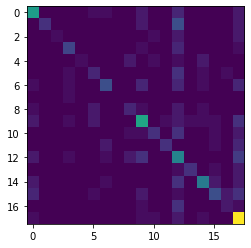

In [95]:
plt.imshow(confusion_matrix(y_test, clf.predict(X_test)))

In [96]:
print("\n Accuracy: ", accuracy_score(y_test, clf.predict(X_test)))
print("\n Classification Report")
print("==================================")
print("\n", classification_report(y_test, clf.predict(X_test)))


 Accuracy:  0.47330960854092524

 Classification Report

               precision    recall  f1-score   support

         Bug       0.57      0.64      0.60        25
        Dark       1.00      0.27      0.42        15
      Dragon       1.00      0.17      0.29         6
    Electric       0.55      0.55      0.55        11
       Fairy       1.00      0.14      0.25         7
    Fighting       0.33      0.30      0.32        10
        Fire       0.58      0.37      0.45        19
      Flying       0.00      0.00      0.00         1
       Ghost       0.38      0.30      0.33        10
       Grass       0.49      0.53      0.51        32
      Ground       0.57      0.31      0.40        13
         Ice       0.80      0.40      0.53        10
      Normal       0.23      0.46      0.31        28
      Poison       0.80      0.50      0.62         8
     Psychic       0.63      0.52      0.57        23
        Rock       0.54      0.35      0.42        20
       Steel       0.4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
print("\n Accuracy: ", accuracy_score(y_test, gs_clf.predict(X_test)))
print("\n Classification Report")
print("==================================")
print("\n", classification_report(y_test, gs_clf.predict(X_test)))


 Accuracy:  0.49466192170818507

 Classification Report

               precision    recall  f1-score   support

         Bug       0.57      0.64      0.60        25
        Dark       1.00      0.40      0.57        15
      Dragon       0.50      0.17      0.25         6
    Electric       0.50      0.55      0.52        11
       Fairy       0.50      0.14      0.22         7
    Fighting       0.50      0.30      0.37        10
        Fire       0.41      0.37      0.39        19
      Flying       0.00      0.00      0.00         1
       Ghost       0.42      0.50      0.45        10
       Grass       0.50      0.50      0.50        32
      Ground       0.67      0.31      0.42        13
         Ice       0.67      0.40      0.50        10
      Normal       0.30      0.50      0.38        28
      Poison       0.80      0.50      0.62         8
     Psychic       0.67      0.61      0.64        23
        Rock       0.47      0.35      0.40        20
       Steel       0.3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In summary, we can see the grid search classifier is better than the best classifier, however, an accuracy around 0.49 still can be improved.
We're going to pick this analysis up in the next notebook where we'll look at using HuggingFace Transformers to improve the result.